In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *
import os
from scipy.sparse import lil_matrix
from scipy.sparse import linalg
from scipy.sparse import csr_matrix
import pdb

img shape  (119, 110, 3)
toy_img shape  (119, 110, 3)
toy_img new shape  (119, 110, 3)


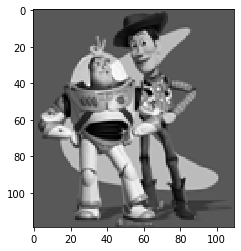

In [74]:
img = cv2.imread('samples/toy_problem.png')
print("img shape ", img.shape)
toy_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("toy_img shape ", img.shape)
toy_img = cv2.cvtColor(toy_img, cv2.COLOR_BGR2GRAY).astype('double') / 255.0
print("toy_img new shape ", img.shape)
plt.imshow(toy_img, cmap="gray")

## Part 1 Toy Problem (20 pts)

In [104]:
def toy_reconstruct(toy_img):
    """
    The implementation for gradient domain processing is not complicated, but it is easy to make a mistake, so let's start with a toy example. Reconstruct this image from its gradient values, plus one pixel intensity. Denote the intensity of the source image at (x, y) as s(x,y) and the value to solve for as v(x,y). For each pixel, then, we have two objectives:
    1. minimize (v(x+1,y)-v(x,y) - (s(x+1,y)-s(x,y)))^2
    2. minimize (v(x,y+1)-v(x,y) - (s(x,y+1)-s(x,y)))^2
    Note that these could be solved while adding any constant value to v, so we will add one more objective:
    3. minimize (v(1,1)-s(1,1))^2
    
    :param toy_img: numpy.ndarray
    """
    print("toy_image: ", toy_img.shape)
    im_h, im_w = toy_img.shape
    im2var = np.arange(im_h * im_w).reshape(im_h, im_w) # value is transposed??

    print("im_h, im_w ", im_h, im_w)
    print("im2var shape ", im2var.shape)
    print("toy_img shape ", toy_img.shape)
    # Objective 1
    #  e = e + 1
    # A[e][im2var[y][x+1] = 1
    # A[e][im2var[y][x]] = -1
    # b[e] = im[y][x+1] - im[y][x]
    
    # A matrix bounds im_h * im_w
    
    sparse_h = 2 * im_h * im_w + 1
    sparse_w = im_h * im_w
    A = lil_matrix((sparse_h, sparse_w), dtype = np.float64)
    print("A ", A.shape)
    b = np.zeros(sparse_h, np.float64)
    print("b ", b.shape)
    
    e = 0
    A[e, im2var[0][0]] = 1
    b[e] = toy_img[0][0]
#     pdb.set_trace()
    for y in range(im_h): #im2var.shape[0])
        for x in range(im_w): #im2var.shape[1])

            # Need to handle border cases. x == im_w-1 and y == im_h-1
            #Objective 1
            e = e + 1
            if(x != im_w-1):
                A[e, im2var[y][x+1]] = 1
                A[e, im2var[y][x]] = -1
                b[e] = toy_img[y][x+1] - toy_img[y][x]
            else:
                A[e, im2var[y][x]] = -1
                b[e] = -toy_img[y][x]

            #Objective 2
            e = e + 1
            if(y != im_h-1):
                A[e, im2var[y+1][x]] = 1
                A[e, im2var[y][x]] = -1
                b[e] = toy_img[y+1][x] - toy_img[y][x]
            else:
                A[e, im2var[y][x]] = -1
                b[e] = -toy_img[y][x]
    
    v = linalg.lsqr(csr_matrix(A), b)
    print("v[0] shape is ", len(v[0]))
    print("v shape is ", len(v))
    res = v[0].reshape(im_h, im_w)
    print("res.shape is ", res.shape)
    return res

In [106]:
im_out = toy_reconstruct(toy_img)
# print("toy_img ", toy_img)
# print("im_out ", im_out)
if im_out.any():
    print("Error is: ", np.sqrt(((im_out - toy_img)**2).sum()))

toy_image:  (119, 110)
im_h, im_w  119 110
im2var shape  (119, 110)
toy_img shape  (119, 110)
A  (26181, 13090)
b  (26181,)
v[0] shape is  13090
v shape is  10
res.shape is  (119, 110)
Error is:  0.0001901762385198699


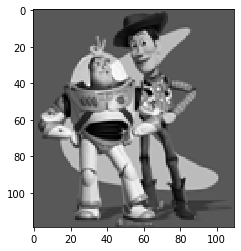

In [43]:
plt.imshow(im_out, cmap='gray')

## Preparation

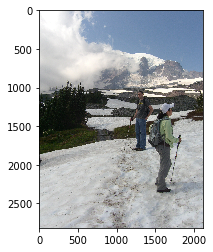

In [107]:
# Feel free to change image
background_img = cv2.cvtColor(cv2.imread('samples/im2.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)

If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


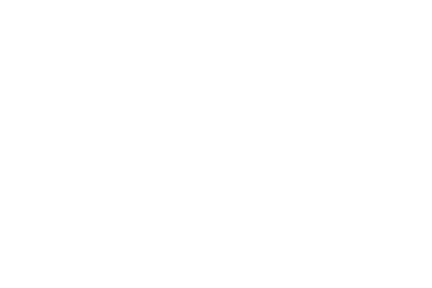

<IPython.core.display.Javascript object>


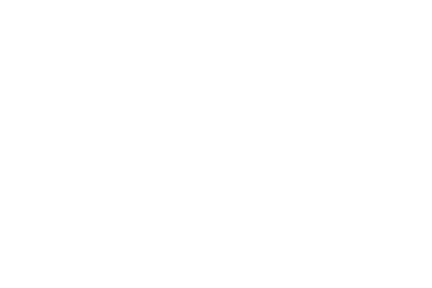

In [108]:
# Feel free to change image
object_img = cv2.cvtColor(cv2.imread('samples/penguin-chick.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
import matplotlib.pyplot as plt
%matplotlib notebook
mask_coords = specify_mask(object_img)

In [ ]:
xs = mask_coords[0]
ys = mask_coords[1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
mask = get_mask(ys, xs, object_img)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
bottom_center = specify_bottom_center(background_img)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
cropped_object, object_mask = align_source(object_img, mask, background_img, bottom_center)

## Part 2 Poisson Blending (50 pts)

In [ ]:
def poisson_blend(cropped_object, object_mask, background_img):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    pass

In [ ]:
im_blend = poisson_blend(cropped_object, object_mask, background_img)
if im_blend.any():
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.imshow(im_blend)

## Part 3 Mixed Gradients (20 pts)

In [ ]:
def mix_blend(cropped_object, object_mask, background_img):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    pass

In [ ]:
im_mix = mix_blend(cropped_object, object_mask, background_img)
if im_mix.any():
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.imshow(im_mix)

# Bells & Whistles (Extra Points)

## Color2Gray (20 pts)

In [ ]:
def color2gray(img):
    pass

## Laplacian pyramid blending (20 pts)

In [ ]:
def laplacian_blend(img1, img2):
    pass

## More gradient domain processing (up to 20 pts)